In [48]:
from PIL import Image, ImageOps
from diffusers import DiffusionPipeline
from transparent_background import Remover
import torch
import io


# function to add space around the image (accept the multiplier for height and width)
def expand_background(image, multiplier):
    # get the size of the image
    width, height = image.size
    new_image = Image.new('RGBA', (width * multiplier, height * multiplier))
    # paste the original image in the center of the new image
    new_image.paste(image, (int((width * multiplier - width) / 2), int((height * multiplier - height) / 2)))
    return new_image


def resize_with_padding(img, expected_size):
    img.thumbnail((expected_size[0], expected_size[1]))
    delta_width = expected_size[0] - img.size[0]
    delta_height = expected_size[1] - img.size[1]
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    return ImageOps.expand(img, padding)




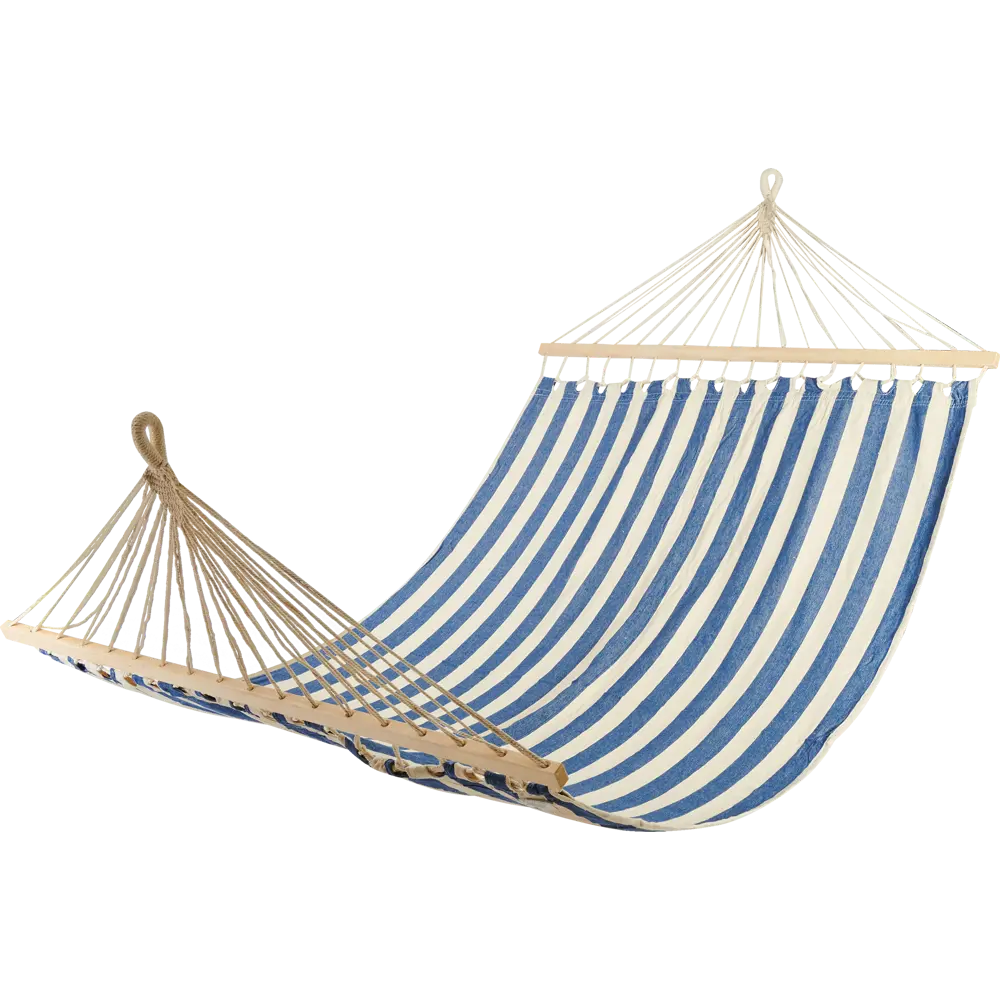

In [49]:
# load image
image = Image.open('gamak.png')
image

In [56]:
prompt = ''
if not prompt:
    print('Prompt is empty')
else:
    print('Prompt is not empty')

Prompt is empty


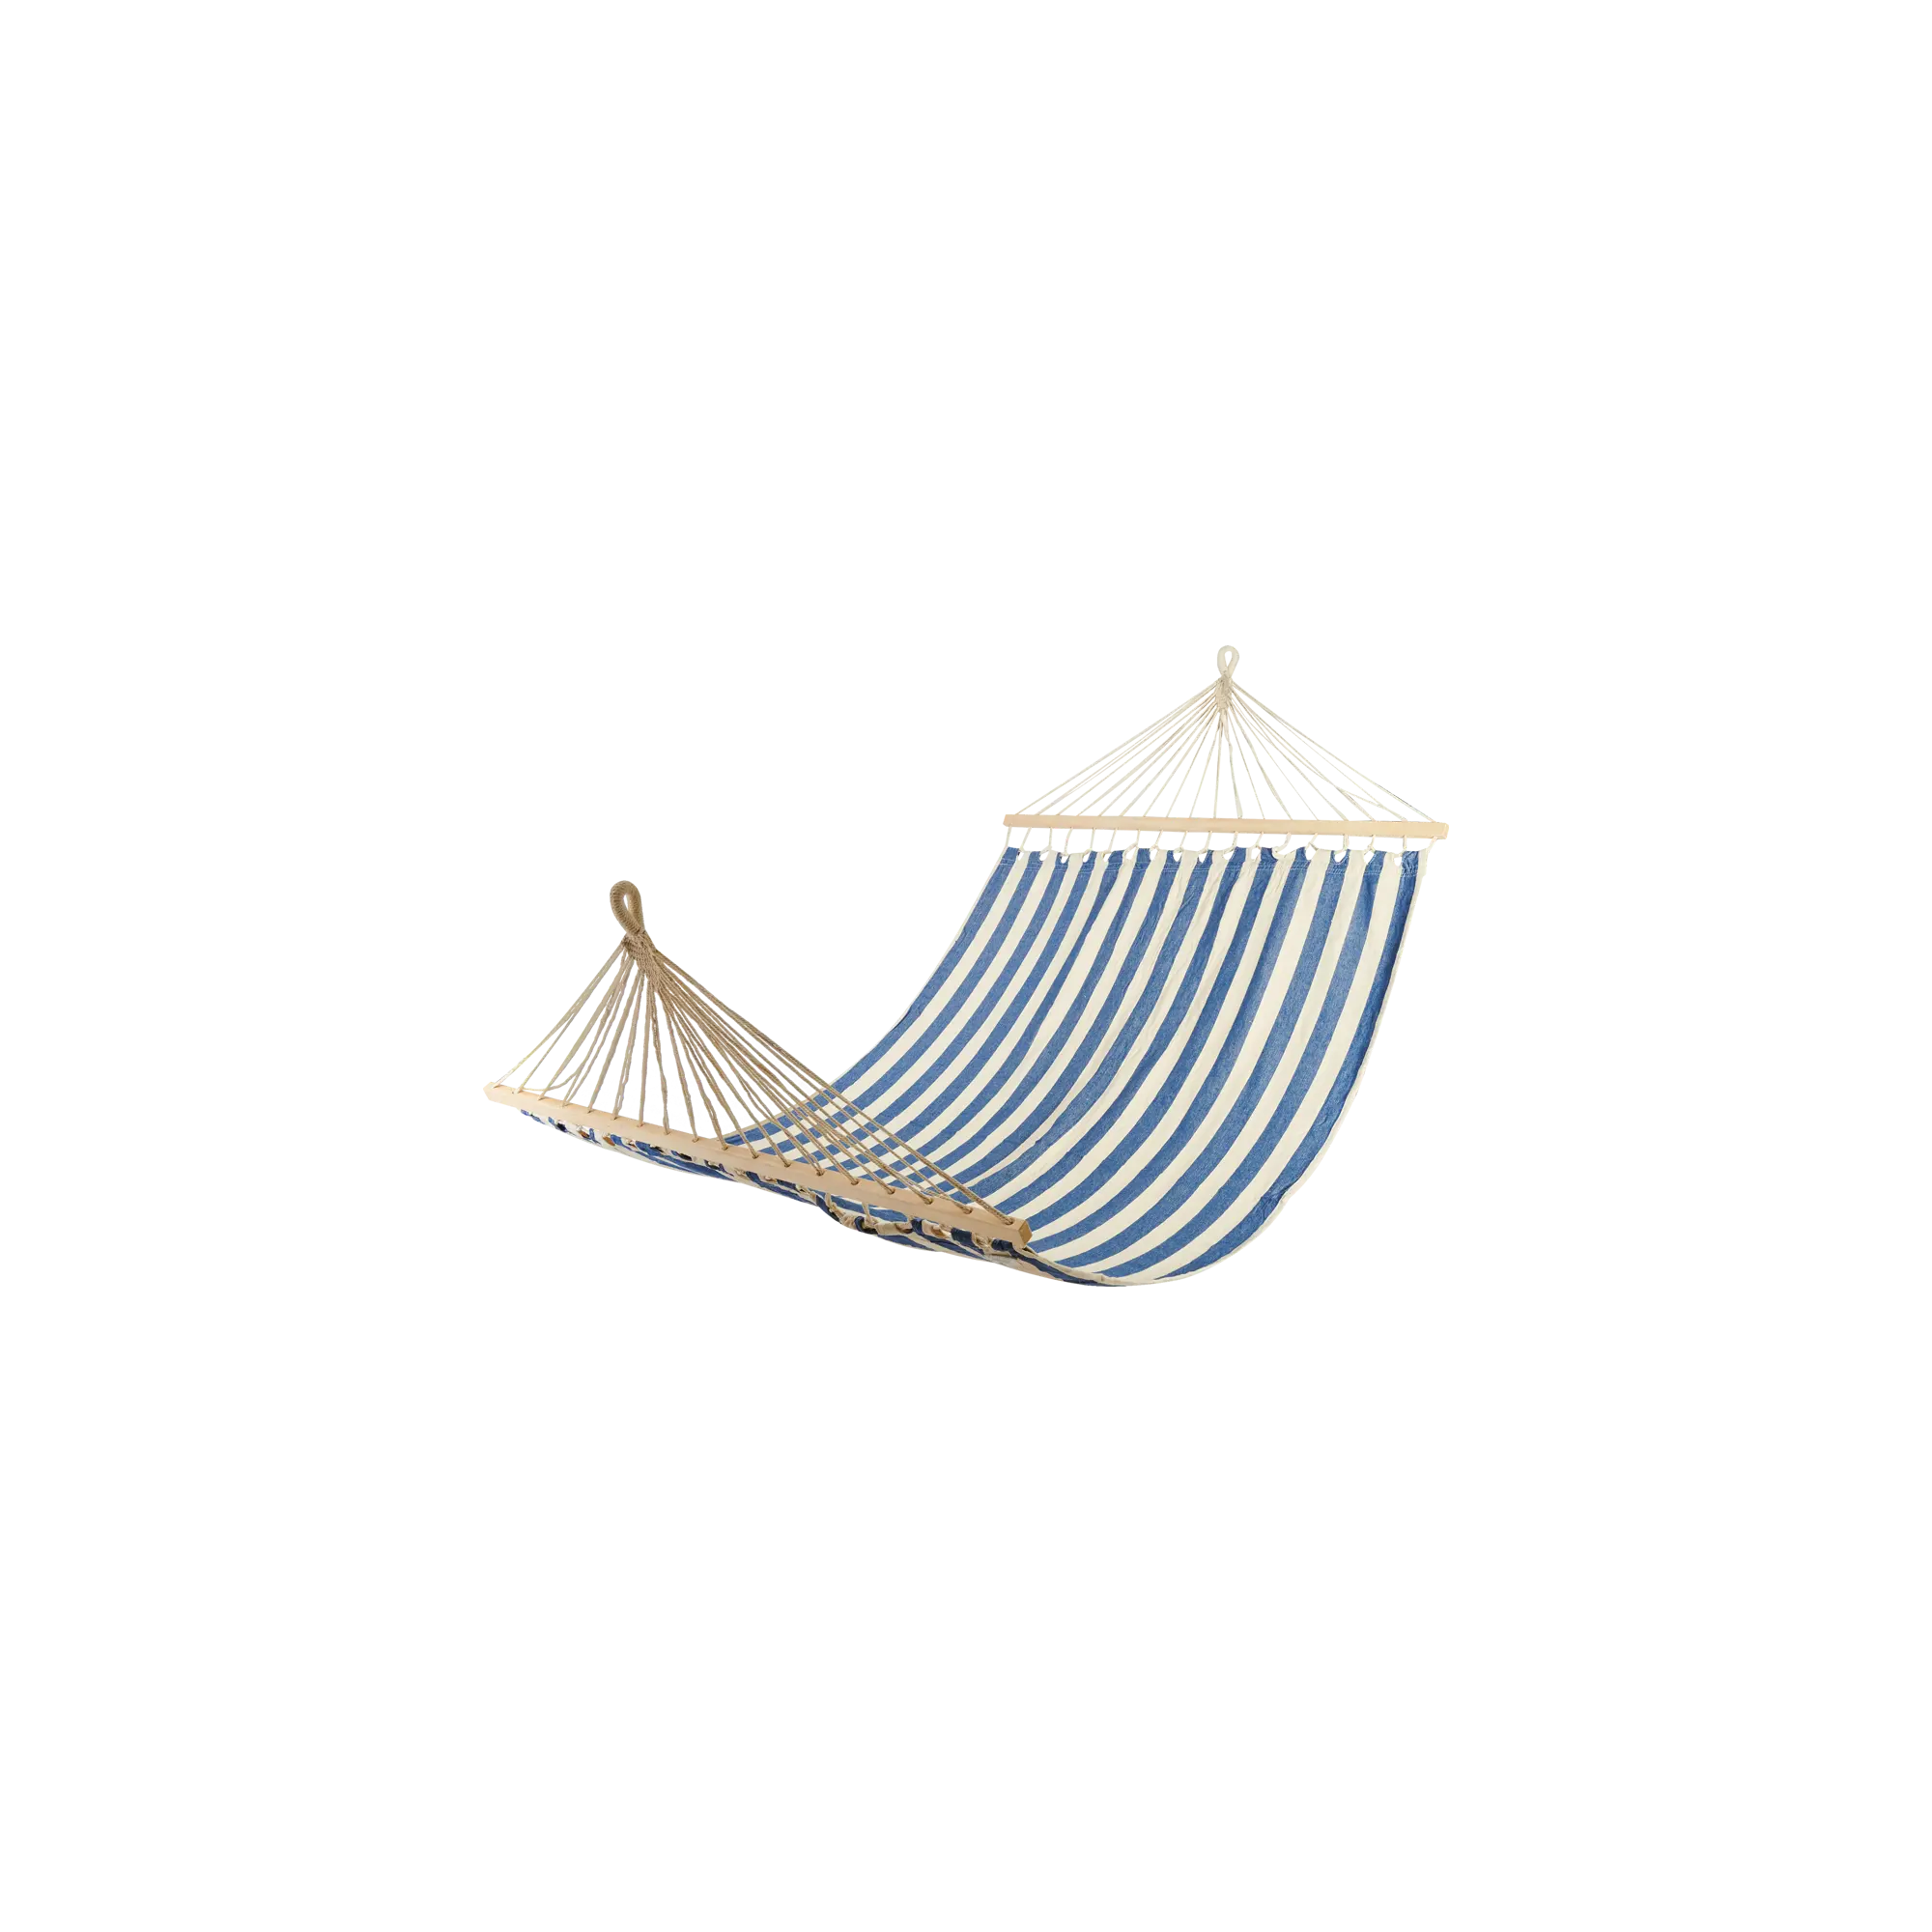

In [50]:
image = expand_background(image, 2)
image

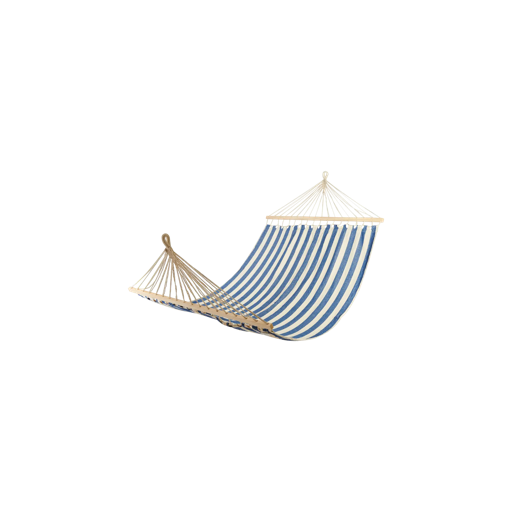

In [51]:
image = resize_with_padding(image, (512, 512))
image